# ''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''' REGRESI LINEAR  '''''''''''''''''''''''''''''''''''''''''''''''''''''''   .............. (*Physicochemical Properties of Protein Tertiary Structure*) ............ 

              ( https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure )
                    
                                       
                            _________________________ [ Attribute Information ] _______________________
                           |                                                                           |
                           |        RMSD - Size of the residue                                         |
                           |        F1   - Total surface area                                          |
                           |        F2   - Non polar exposed area                                      |
                           |        F3   - Fractional area of exposed non polar residue                |
                           |        F4   - Fractional area of exposed non polar part of residue        |
                           |        F5   - Molecular mass weighted exposed area                        |
                           |        F6   - Average deviation from standard exposed area of residue     |
                           |        F7   - Euclidian distance                                          |
                           |        F8   - Secondary structure penalty                                 |
                           |        F9   - Spacial Distribution constraints (N,K Value)                |
                           |__________________________________ ,,,,, __________________________________|
      
      
      
Data set Physicochemical Properties of Protein Tertiary Structure merupakan data csv yang berisi pengukuran molekul protein yang berbentuk tersier 3 dimensi. Molekul protein yang disajikan dalam data berikut terdiri atas variabel dependen (terikat) dan variabel independen (bebas). Variabel independen yakni Total surface area, Non polar exposed area, Fractional area of exposed non polar residue, Fractional area of exposed non polar part of residue, Molecular mass weighted exposed area, Average deviation from standard exposed area of residue, Euclidian distance, Secondary structure penalty, dan Spacial Distribution constraints (N,K Value) dianggap dapat mempengaruhi RMSD (Size of the residue) sebagai variabel dependen. Adapun untuk membuktikan variabel independen yang memiliki korelasi paling tinggi dapat dibuktikan dengan menggunakan regresi linear dengan tahapan sebagai berikut:

### ............................................................  Input variabel-variabel data CVS  .................................................................

In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

import csv
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [151]:
df = pd.read_csv("Physicochemical_Properties_of_Protein_Tertiary_Structure.csv")
df.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
RMSD    45730 non-null float64
F1      45730 non-null float64
F2      45730 non-null float64
F3      45730 non-null float64
F4      45730 non-null float64
F5      45730 non-null float64
F6      45730 non-null float64
F7      45730 non-null float64
F8      45730 non-null int64
F9      45730 non-null float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [153]:
df_x =['F1','F2','F3','F4','F5','F6','F7','F8','F9']
X = df[df_x]
Y = df.RMSD

In [154]:
df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


In [155]:
print("Train Set Total Row Number: {0} \nTrain Set Total Col Number: {1}".format(df.shape[0], df.shape[1]))

Train Set Total Row Number: 45730 
Train Set Total Col Number: 10


### .................................................... Visualisasi Variabel Independen - Dependen .........................................................

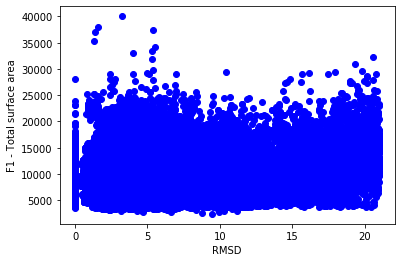

In [156]:
plt.scatter(df.RMSD, df.F1, color='blue')
plt.xlabel("RMSD")
plt.ylabel("F1 - Total surface area")
plt.show()

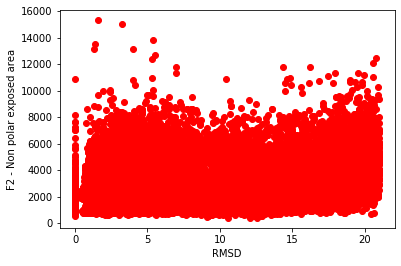

In [157]:
plt.scatter(df.RMSD, df.F2, color='red')
plt.xlabel("RMSD")
plt.ylabel("F2 - Non polar exposed area")
plt.show()

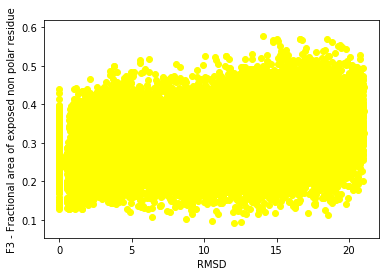

In [158]:
plt.scatter(df.RMSD, df.F3, color='yellow')
plt.xlabel("RMSD")
plt.ylabel("F3 - Fractional area of exposed non polar residue")
plt.show()

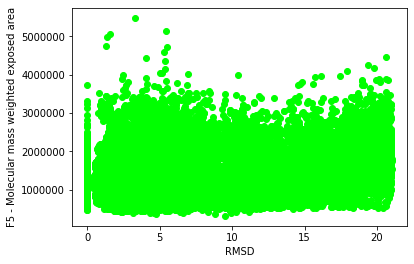

In [159]:
plt.scatter(df.RMSD, df.F5, color='lime')
plt.xlabel("RMSD")
plt.ylabel("F5 - Molecular mass weighted exposed area")
plt.show()

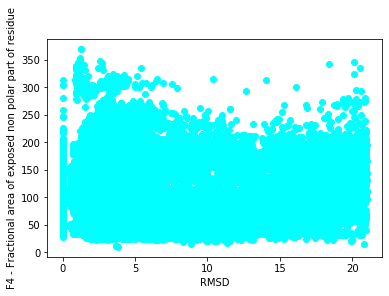

In [160]:
plt.scatter(df.RMSD, df.F4, color='aqua')
plt.xlabel("RMSD")
plt.ylabel("F4 - Fractional area of exposed non polar part of residue")
plt.show()

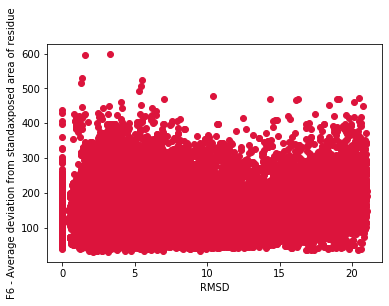

In [161]:
plt.scatter(df.RMSD, df.F6, color='crimson')
plt.xlabel("RMSD")
plt.ylabel("F6 - Average deviation from standaxposed area of residue")
plt.show()

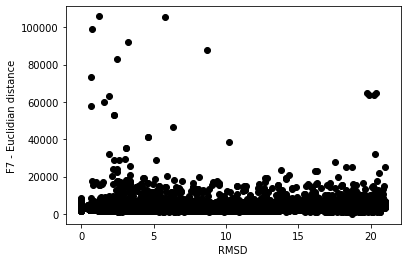

In [162]:
plt.scatter(df.RMSD, df.F7, color='black')
plt.xlabel("RMSD")
plt.ylabel("F7 - Euclidian distance")
plt.show()

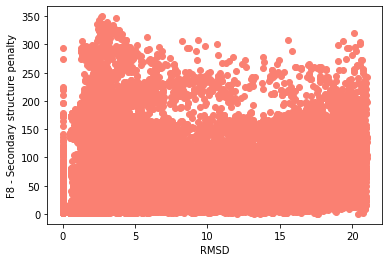

In [163]:
plt.scatter(df.RMSD, df.F8, color='salmon')
plt.xlabel("RMSD")
plt.ylabel("F8 - Secondary structure penalty")
plt.show()

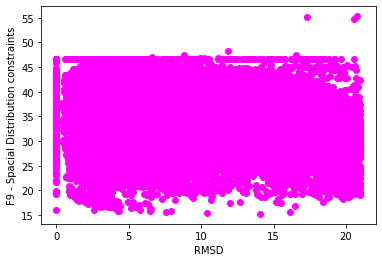

In [164]:
plt.scatter(df.RMSD, df.F9, color='magenta')
plt.xlabel("RMSD")
plt.ylabel("F9 - Spacial Distribution constraints")
plt.show()

Berdasarkan data yang disajikan di atas, maka dapat diketahui bahwa setiap variabel independen yang dikorelasikan terhadap variabel dependen menunjukkan mayoritas data terdistribusi dengan normal. Hal ini dapat dibuktikan dengan kerapatan setiap data yang hampir tidak menunjukkan celah. Untuk lebih jelasnya dapat dilakukan uji statistik normalitas data untuk membuktikan nilai distribusi data dari setiap variabel yang dimiliki.

### ............................................................... Visualisasi Berdasarkan Heatmap ..............................................................

In [165]:
dataframe = pd.read_csv(r"Physicochemical_Properties_of_Protein_Tertiary_Structure.csv")
dataframe.columns = ['RMSD','F1','F2','F3','F4','F5','F6','F7','F8','F9']

[Text(0, 0, 'RMSD'),
 Text(0, 0, 'F1'),
 Text(0, 0, 'F2'),
 Text(0, 0, 'F3'),
 Text(0, 0, 'F4'),
 Text(0, 0, 'F5'),
 Text(0, 0, 'F6'),
 Text(0, 0, 'F7'),
 Text(0, 0, 'F8'),
 Text(0, 0, 'F9')]

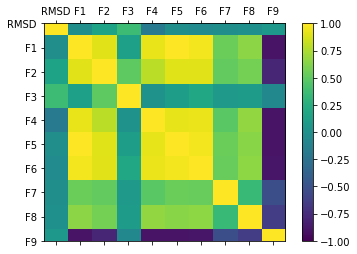

In [166]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)

Berdasaran hasil grafik yang teah diperoleh di atas, maka dapat disimpulkan bahwa variabel independen yang paling berpengaruh terhadap RMSD ialah F3-Fractional area of exposed non polar residue. Hal ini dapat dibuktikan dengan warna map yang ditunjukkan oleh F3 adalah yang paling terang. Penentuan koleasi antar variabel berdasarkan Heatmap dapat ditentukan berdasarkan warna yang paling terang (merujuk pada nilai paling positif) dan warna yang paling gelap (merujuk pada nilaiyang paling negatif). Pada tahap ini, ditentukan variabel yang memiliki korelasi tinggi ialah yang memiliki nilai positif sehingga difokuskan pada warna map yang paling terang. Pengujian lebih lanjut terkait nilai korelasi antara variabel F3 dengan RMSD dapat dibuktikan dengan Regresi Linear.

### .................................................................. Pengujian Regresi Linear ...........................................................................

In [167]:
print("Correlation:", dataframe.corr(method='pearson'))

Correlation:           RMSD        F1        F2        F3        F4        F5        F6  \
RMSD  1.000000 -0.015087  0.156895  0.374309 -0.169771 -0.013982 -0.036135   
F1   -0.015087  1.000000  0.906606  0.126285  0.931056  0.998185  0.967531   
F2    0.156895  0.906606  1.000000  0.502562  0.793143  0.902853  0.908354   
F3    0.374309  0.126285  0.502562  1.000000  0.031230  0.122622  0.200650   
F4   -0.169771  0.931056  0.793143  0.031230  1.000000  0.925707  0.938108   
F5   -0.013982  0.998185  0.902853  0.122622  0.925707  1.000000  0.961769   
F6   -0.036135  0.967531  0.908354  0.200650  0.938108  0.961769  1.000000   
F7   -0.003339  0.554002  0.515929  0.080064  0.485185  0.553729  0.538198   
F8    0.000344  0.651251  0.584242  0.095340  0.676919  0.642961  0.662584   
F9    0.062830 -0.898240 -0.786188 -0.069039 -0.891766 -0.897765 -0.881973   

            F7        F8        F9  
RMSD -0.003339  0.000344  0.062830  
F1    0.554002  0.651251 -0.898240  
F2    0.515929  0

RMSE =  5.163758281282379
R Square: 0.2822366745381507
intercept: 5.487926762864778
slope: [ 1.53284406e-03  1.30636258e-03  1.87338275e+01 -1.08693695e-01
 -3.64408876e-06 -2.20103249e-02 -1.43215450e-04  1.48393178e-02
 -1.02034154e-01]


,Coefficient
F1,0.001533
F2,0.001306
F3,18.733828
F4,-0.108694
F5,-0.000004
F6,-0.022010
F7,-0.000143
F8,0.014839
F9,-0.102034


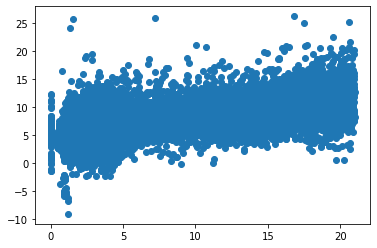

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1)
model =LinearRegression()

model.fit(X_train,y_train)

y_pred=model.predict( X_test)
plt.scatter(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('RMSE = ',RMSE)
r_sq = model.score(X, Y)
intercept = model.intercept_
coef = model.coef_
print('R Square:', r_sq)
print('intercept:', intercept)
print('slope:',coef)
pd.DataFrame(data=model.coef_, index=X.columns, columns=['Coefficient'])

Berdasarkan hasi pengujian regresi linear, diperoleh nilai korelasi tertinggi terhadap variabel dependen RMSD dimiliki oleh F3 yakni sebesar 0.374309. Nilai RMSE atau nilai tingkat akurasi peramalan yang diperoleh ialah sebesar 5.1637. Nilai rata-rata perpotongan (intercept) antara variabel dependen RMSD dan variabel independen F3 yang diperoleh ialah sebesar 5.487. Besar nilai koefsien yang diperoleh dari data di atas adalah sebesar 18.7338. Adapun nilai r square yang diperoleh adalah sebesar 0.28 yang menunjukkan bahwa variabel F3 memiliki korelasi yang cukup kuat dengan vriabel RMSD.

### ................................................................................. Kesimpulan  .................................................................................

Meskipun demikian, variabel dependen RMSD tetap dipengaruhi oleh variabel independen lainnya selain F3. Adapun kesimpulan yang dapat ditarik dari hasil pengujian regresi linear ini ialah, area perpecahan residu non-polar terbuka berkorelasi dengan RMSD (ukuran residu molekul protein).




## _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ Terima Kasih :)  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _